In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torchvision.datasets as vdatasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random
import numpy as np
import os
DATA_PATH = os.environ['DATA_PATH']
%matplotlib inline

In [2]:
# Hyper Parameters 
INPUT_SIZE = 784
HIDDEN_SIZE = 256 # undercomplete !
EPOCH = 5
BATCH_SIZE = 100
LR = 0.01

In [3]:
# MNIST Dataset (Images and Labels)
train_dataset = vdatasets.MNIST(root=DATA_PATH+'MNIST/', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True)

## TODO: AutoEncoder 모델링 

* 히든레이어가 하나인 AutoEncoder를 만드시오
* Activation Function으로는 ReLU를 사용하시오

In [4]:
class Autoencoder(nn.Module):
    def __init__(self, input_size,hidden_size):
        super(Autoencoder, self).__init__()
        self.f = nn.Linear(input_size,hidden_size)
        self.g = nn.Linear(hidden_size,input_size)

    def forward(self, x):
        # TODO
        z = F.relu(self.f(x)) 
        r = F.sigmoid(self.g(z))
        return r

In [5]:
model = Autoencoder(INPUT_SIZE,HIDDEN_SIZE)

loss_function = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=LR)

In [6]:
for epoch in range(EPOCH):
    for i, (inputs, _) in enumerate(train_loader):
        inputs = Variable(inputs.view(-1, 28*28))
        optimizer.zero_grad()
        recon = model(inputs)
        loss = loss_function(recon, inputs)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, EPOCH, i+1, len(train_dataset)//BATCH_SIZE, loss.data[0]))

Epoch: [1/5], Step: [100/600], Loss: 0.0173
Epoch: [1/5], Step: [200/600], Loss: 0.0094
Epoch: [1/5], Step: [300/600], Loss: 0.0072
Epoch: [1/5], Step: [400/600], Loss: 0.0066
Epoch: [1/5], Step: [500/600], Loss: 0.0053
Epoch: [1/5], Step: [600/600], Loss: 0.0053
Epoch: [2/5], Step: [100/600], Loss: 0.0045
Epoch: [2/5], Step: [200/600], Loss: 0.0048
Epoch: [2/5], Step: [300/600], Loss: 0.0044
Epoch: [2/5], Step: [400/600], Loss: 0.0047
Epoch: [2/5], Step: [500/600], Loss: 0.0042
Epoch: [2/5], Step: [600/600], Loss: 0.0046
Epoch: [3/5], Step: [100/600], Loss: 0.0047
Epoch: [3/5], Step: [200/600], Loss: 0.0038
Epoch: [3/5], Step: [300/600], Loss: 0.0042
Epoch: [3/5], Step: [400/600], Loss: 0.0043
Epoch: [3/5], Step: [500/600], Loss: 0.0042
Epoch: [3/5], Step: [600/600], Loss: 0.0040
Epoch: [4/5], Step: [100/600], Loss: 0.0045
Epoch: [4/5], Step: [200/600], Loss: 0.0043
Epoch: [4/5], Step: [300/600], Loss: 0.0042
Epoch: [4/5], Step: [400/600], Loss: 0.0047
Epoch: [4/5], Step: [500/600], L

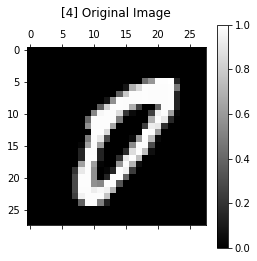

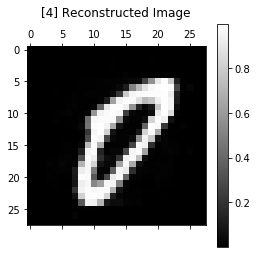

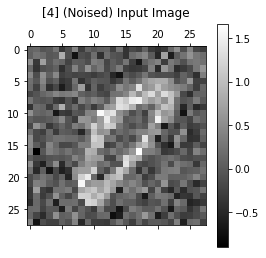

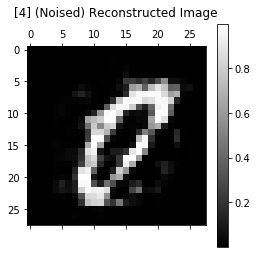

In [8]:
index = random.choice(range(10000))
test = train_dataset[index][0]

plt.matshow(np.reshape(test.numpy(), (28, 28)), cmap=plt.get_cmap('gray'))
plt.title("[" + str(epoch) + "] Original Image\n")
plt.colorbar()
plt.show()

recon = model(Variable(test).view(-1,28*28))

plt.matshow(np.reshape(recon.data.numpy(), (28, 28)), cmap=plt.get_cmap('gray'))
plt.title("[" + str(epoch) + "] Reconstructed Image\n")
plt.colorbar()
plt.show()

noised = Variable(test) + 0.3*Variable(torch.randn(test.size()))

plt.matshow(np.reshape(noised.data.numpy(), (28, 28)), cmap=plt.get_cmap('gray'))
plt.title("[" + str(epoch) + "] (Noised) Input Image\n")
plt.colorbar()
plt.show()

noised_recon = model(noised.view(-1,28*28))

plt.matshow(np.reshape(noised_recon.data.numpy(), (28, 28)), cmap=plt.get_cmap('gray'))
plt.title("[" + str(epoch) + "] (Noised) Reconstructed Image\n")
plt.colorbar()
plt.show()